## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm

df = pd.read_feather('./experiment/analysis_result.ftr')
models = df.columns[6:-2]
categories = ('kda', 'gold', 'creep', 'avg')
labels = ('KDA', 'Gold', 'Minion Kills', 'Avg. of Indicators')

analysis = defaultdict(lambda: defaultdict(lambda: np.zeros([10, 10], dtype=np.int32)))

for row in tqdm(df.itertuples(), total=len(df)):
    for cat in categories:
        for model in models:
            analysis[model][cat][getattr(row, model)-1][getattr(row, cat)-1] += 1

100%|██████████| 455750/455750 [00:20<00:00, 21892.70it/s]


In [2]:
cmap = {
    'red': ((0.0, 0.0, 0.0), (0.5, 1.0, 1.0), (1.0, 1.0, 1.0)),
    'green': ((0.0, 0.0, 0.0), (0.5, 0.0, 0.0), (1.0, 1.0, 1.0)),
    'blue': ((0.0, 1.0, 1.0), (0.5, 0.0, 0.0), (1.0, 0.0, 0.0))
}
cmap = LinearSegmentedColormap('IR', cmap)

max_count = 0
for model in models:
    for cat in categories:
        local_max = analysis[model][cat].max()
        max_count = max(max_count, local_max)

## Normal 모델 (Model 2) 스코어

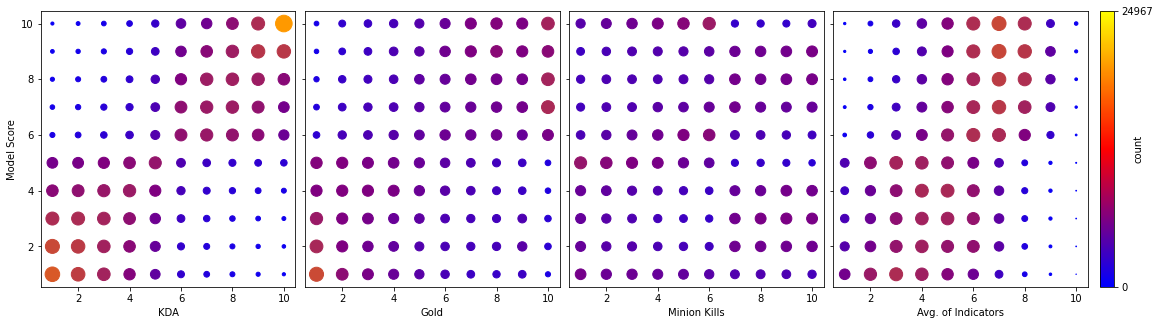

In [3]:
cols = 2
rows = len(categories)/cols + (len(categories)%cols != 0)
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4.4*rows), sharey=True, constrained_layout=True)

axis_x, axis_y = zip(*[(x+1, y+1) for y in range(10) for x in range(10)])
dfs = [analysis['normal'][cat] for cat in categories]
for i in range(len(categories)):
    count = [dfs[i][x][y] for x in range(10) for y in range(10)]
    size = count/max_count*500

    color = [(min(2*c/max_count, 1), min(max(2*c/max_count-0.5, 0), 1), (max(1-2*(c/max_count), 0))) for c in count]
    axes[i].set_xlabel(labels[i])
    if i==0: axes[i].set_ylabel('Model Score')
    axes[i].scatter(x=axis_x, y=axis_y, s=size, c=color)

cbar = plt.colorbar(cm.ScalarMappable(cmap=cmap), ticks=[0, 1])
cbar.set_label(label='count', labelpad=-20)
cbar.set_ticklabels(['0', f'{max_count}'])

## normal_bce 모델 (Model 5) 스코어

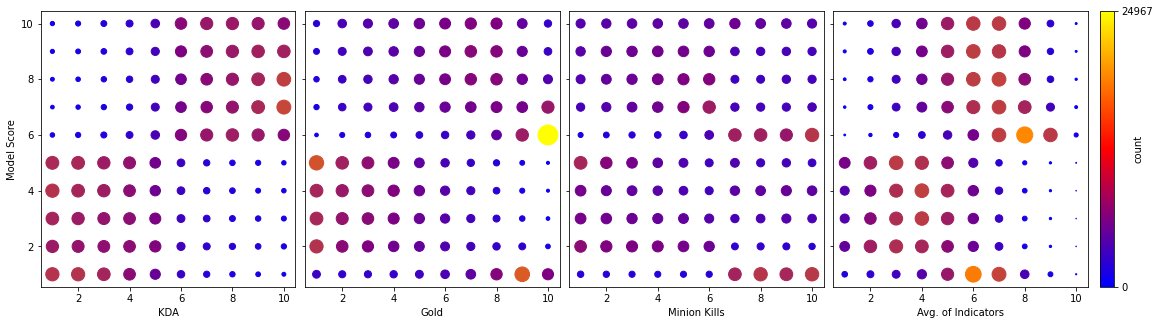

In [4]:
fig, axes = plt.subplots(1, len(categories), figsize=(4*len(categories), 4.4), sharey=True, constrained_layout=True)

axis_x, axis_y = zip(*[(x+1, y+1) for y in range(10) for x in range(10)])
dfs = [analysis['normal_bce'][cat] for cat in categories]
for i in range(len(categories)):
    count = [dfs[i][x][y] for x in range(10) for y in range(10)]
    size = count/max_count*500

    color = [(min(2*c/max_count, 1), min(max(2*c/max_count-0.5, 0), 1), (max(1-2*(c/max_count), 0))) for c in count]
    axes[i].set_xlabel(labels[i])
    if i==0: axes[i].set_ylabel('Model Score')
    axes[i].scatter(x=axis_x, y=axis_y, s=size, c=color)

cbar = plt.colorbar(cm.ScalarMappable(cmap=cmap), ticks=[0, 1])
cbar.set_label(label='count', labelpad=-20)
cbar.set_ticklabels(['0', f'{max_count}'])

## zero_h0 모델 (Model 1) 스코어

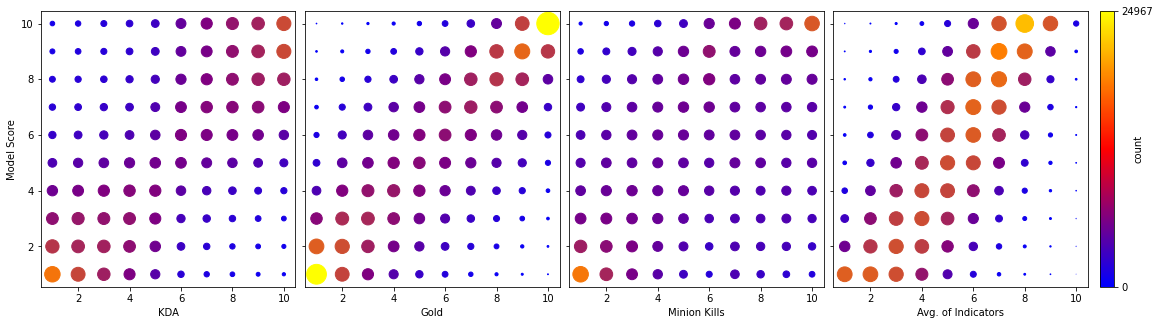

In [5]:
fig, axes = plt.subplots(1, len(categories), figsize=(4*len(categories), 4.4), sharey=True, constrained_layout=True)

axis_x, axis_y = zip(*[(x+1, y+1) for y in range(10) for x in range(10)])
dfs = [analysis['zero_h0'][cat] for cat in categories]
for i in range(len(categories)):
    count = [dfs[i][x][y] for x in range(10) for y in range(10)]
    size = count/max_count*500

    color = [(min(2*c/max_count, 1), min(max(2*c/max_count-0.5, 0), 1), (max(1-2*(c/max_count), 0))) for c in count]
    axes[i].set_xlabel(labels[i])
    if i==0: axes[i].set_ylabel('Model Score')
    axes[i].scatter(x=axis_x, y=axis_y, s=size, c=color)

cbar = plt.colorbar(cm.ScalarMappable(cmap=cmap), ticks=[0, 1])
cbar.set_label(label='count', labelpad=-20)
cbar.set_ticklabels(['0', f'{max_count}'])

## zero_h0 bce 모델 (Model 4) 스코어

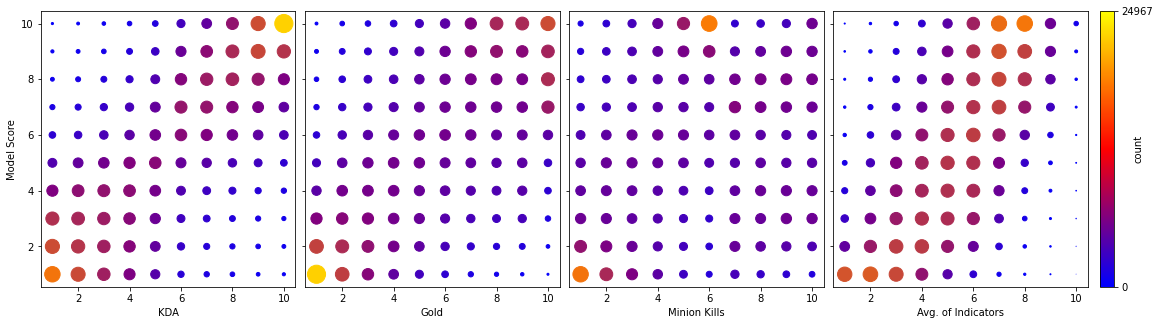

In [6]:
fig, axes = plt.subplots(1, len(categories), figsize=(4*len(categories), 4.4), sharey=True, constrained_layout=True)

axis_x, axis_y = zip(*[(x+1, y+1) for y in range(10) for x in range(10)])
dfs = [analysis['zero_h0_bce'][cat] for cat in categories]
for i in range(len(categories)):
    count = [dfs[i][x][y] for x in range(10) for y in range(10)]
    size = count/max_count*500

    color = [(min(2*c/max_count, 1), min(max(2*c/max_count-0.5, 0), 1), (max(1-2*(c/max_count), 0))) for c in count]
    axes[i].set_xlabel(labels[i])
    if i==0: axes[i].set_ylabel('Model Score')
    axes[i].scatter(x=axis_x, y=axis_y, s=size, c=color)

cbar = plt.colorbar(cm.ScalarMappable(cmap=cmap), ticks=[0, 1])
cbar.set_label(label='count', labelpad=-20)
cbar.set_ticklabels(['0', f'{max_count}'])

## zero_h0_reverse 모델 (Model 3) 스코어

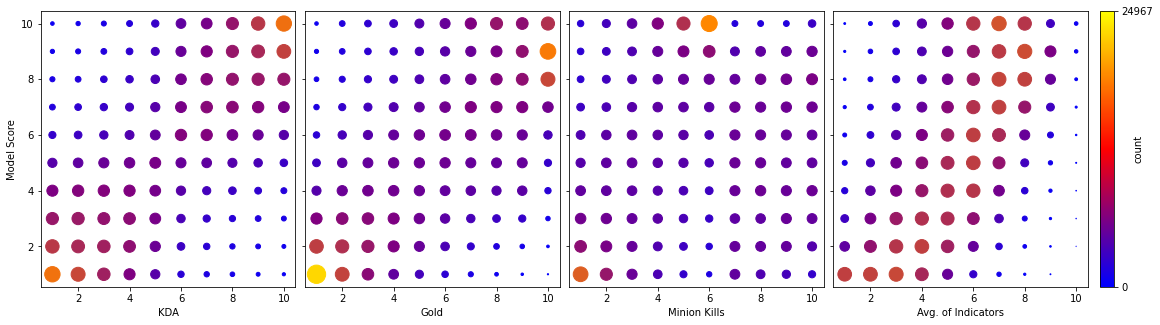

In [7]:
fig, axes = plt.subplots(1, len(categories), figsize=(4*len(categories), 4.4), sharey=True, constrained_layout=True)

axis_x, axis_y = zip(*[(x+1, y+1) for y in range(10) for x in range(10)])
dfs = [analysis['zero_h0_reverse'][cat] for cat in categories]
for i in range(len(categories)):
    count = [dfs[i][x][y] for x in range(10) for y in range(10)]
    size = count/max_count*500

    color = [(min(2*c/max_count, 1), min(max(2*c/max_count-0.5, 0), 1), (max(1-2*(c/max_count), 0))) for c in count]
    axes[i].set_xlabel(labels[i])
    if i==0: axes[i].set_ylabel('Model Score')
    axes[i].scatter(x=axis_x, y=axis_y, s=size, c=color)

cbar = plt.colorbar(cm.ScalarMappable(cmap=cmap), ticks=[0, 1])
cbar.set_label(label='count', labelpad=-20)
cbar.set_ticklabels(['0', f'{max_count}'])

## mlp 모델 (Model 6) 스코어

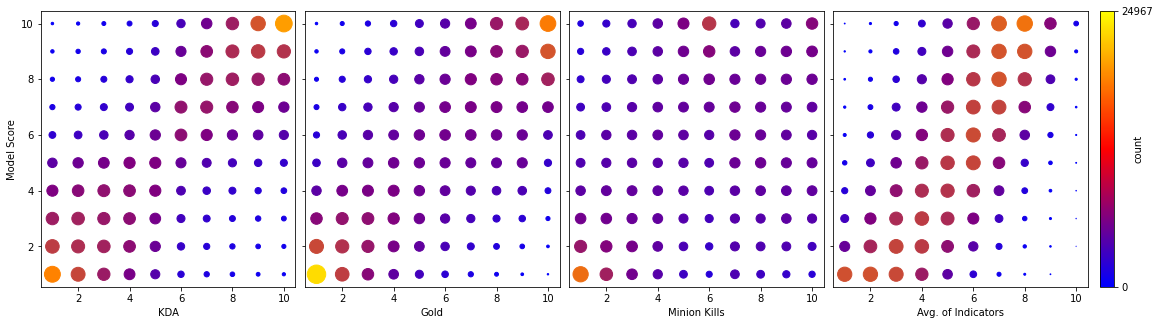

In [8]:
fig, axes = plt.subplots(1, len(categories), figsize=(4*len(categories), 4.4), sharey=True, constrained_layout=True)

axis_x, axis_y = zip(*[(x+1, y+1) for y in range(10) for x in range(10)])
dfs = [analysis['mlp'][cat] for cat in categories]
for i in range(len(categories)):
    count = [dfs[i][x][y] for x in range(10) for y in range(10)]
    size = count/max_count*500

    color = [(min(2*c/max_count, 1), min(max(2*c/max_count-0.5, 0), 1), (max(1-2*(c/max_count), 0))) for c in count]
    axes[i].set_xlabel(labels[i])
    if i==0: axes[i].set_ylabel('Model Score')
    axes[i].scatter(x=axis_x, y=axis_y, s=size, c=color)

cbar = plt.colorbar(cm.ScalarMappable(cmap=cmap), ticks=[0, 1])
cbar.set_label(label='count', labelpad=-20)
cbar.set_ticklabels(['0', f'{max_count}'])

## mlp_bce 모델 (Model 7) 스코어

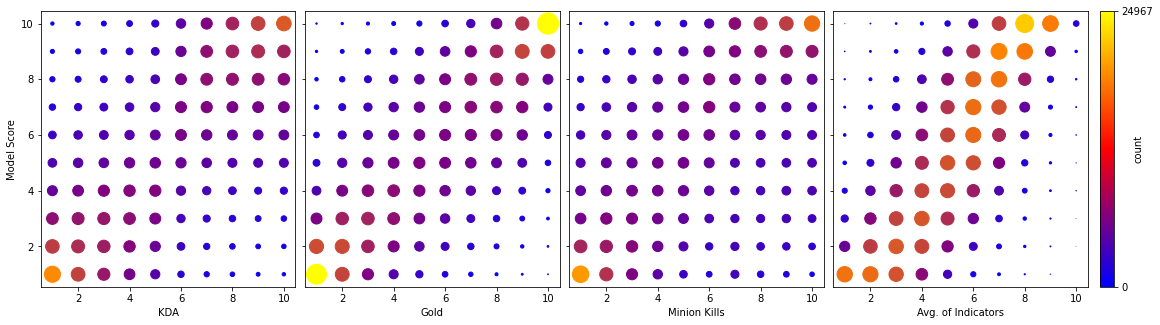

In [9]:
fig, axes = plt.subplots(1, len(categories), figsize=(4*len(categories), 4.4), sharey=True, constrained_layout=True)

axis_x, axis_y = zip(*[(x+1, y+1) for y in range(10) for x in range(10)])
dfs = [analysis['mlp_bce'][cat] for cat in categories]
for i in range(len(categories)):
    count = [dfs[i][x][y] for x in range(10) for y in range(10)]
    size = count/max_count*500

    color = [(min(2*c/max_count, 1), min(max(2*c/max_count-0.5, 0), 1), (max(1-2*(c/max_count), 0))) for c in count]
    axes[i].set_xlabel(labels[i])
    if i==0: axes[i].set_ylabel('Model Score')
    axes[i].scatter(x=axis_x, y=axis_y, s=size, c=color)

cbar = plt.colorbar(cm.ScalarMappable(cmap=cmap), ticks=[0, 1])
cbar.set_label(label='count', labelpad=-20)
cbar.set_ticklabels(['0', f'{max_count}'])